# Author: Midrar Adham
## Homework 2: Pinhole Camera geometry

In [64]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint as pp

**Choose a calibration target with points at known locations. This may be a checker board or anything else you wish to use. Include a picture of your calibration target**
----

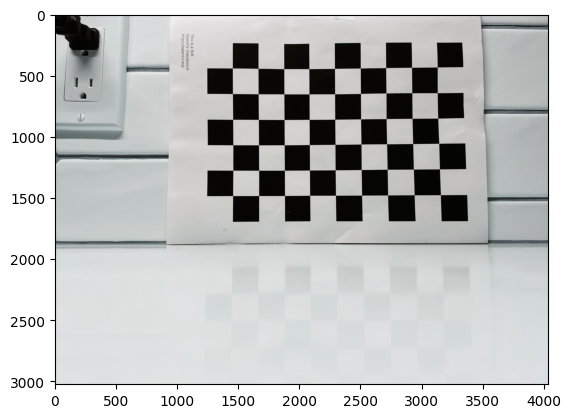

In [66]:
images = 'pattern_1'
img = cv.imread(f'../../sample_data/{images}.jpg')
plt.imshow(img)

**Explain your rationale for using this calibration target.**
----

- Clear pattern.
- Specified dimensions (6x9)
- Therefore, it is easy to process.

**Describe the known geometry of the calibration target. What are the positions of the known points on the target?**
----

- The corners of the checkerboard are known.
- The beginning and ending coordinates of each square are known.
    - The checkerboard has 9 rows and 6 columns.
    - Each square is 25 mm

**Use the calibration target to estimate the camera intrinsic parameters (and preferably the distortion parameters). Write the results of the calibration for the intrinsic camera parameters.**
----

In [67]:
'''
The objp variable is very confusing. Here is a brief explaination. 

1- To calculate the projection matrix, we need 2D coordinates and 3D coordinates.
2- The 2D coordinates can be easily found using openCV method (findchessboardCorners)
3- The 3D coordinates, however, needs some pre-defined variables.
    3A- Create a matrix with the size of the your checkerboard image.
    3B- This matrix may contain just zeroes. It does not matter. These points will be updated later.
    3C- The point is this matrix contains 54 rows and three columns. Each column is x,y, and z of the
    world coordinates frame.
    4D- The next line generates a grid of 2D points. This grid is then mapped to the previously created array
    without the z-axis. Since this is a flat image, the z-axis will remain zero.
'''
def calibrate_cam (images):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    squares_size = 25 # mm
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) * squares_size

    world_3d_points = []
    img_plane_2d_points = []

    image = cv.imread(f'../../sample_data/{images}')
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    corners_found, corners = cv.findChessboardCorners(image = gray,
                                                    patternSize=(9,6),
                                                    flags=None)
    if corners_found == True:
        world_3d_points.append(objp)
        corners2 = cv.cornerSubPix(image=gray,
                                    corners=corners,
                                    winSize=(11,11),
                                    zeroZone=(-1,-1), # A neglected zone. The -1,-1 is like None.
                                    criteria=criteria
                                    ) # more accurate corners (in subpixels)
        
        
        img_plane_2d_points.append(corners)
        cv.drawChessboardCorners(image=image,
                                patternSize=(9,6),
                                corners=corners2,
                                patternWasFound=corners_found)

    image_size = gray.shape[::-1]

    return world_3d_points, img_plane_2d_points, image_size, gray, image


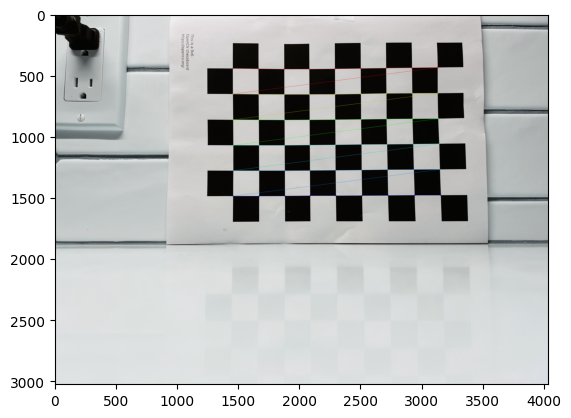

reprojection_error = 
1.4863805659272031

camera_matrix = 
[[9.86570106e+03 0.00000000e+00 1.84854015e+03]
 [0.00000000e+00 1.00602950e+04 1.43169519e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


distortion_coefficients = 
[[ 3.78307389e+00 -1.70535158e+02 -7.49524058e-03 -3.54159671e-02
   3.13576081e+03]]



In [68]:
world_3d_points, img_plane_2d_points, image_size, img, colored = calibrate_cam(images=images+'.jpg')
reprojection_error, camera_matrix, distortion_coefficients, rotation_vectors, translation_vectors = cv.calibrateCamera(world_3d_points,
                                                                                                                        img_plane_2d_points,
                                                                                                                        image_size,
                                                                                                                        None,
                                                                                                                        None,
                                                                                                                        )
plt.imshow(colored)
plt.show()

print(f'reprojection_error = \n{reprojection_error}\n')
print(f'camera_matrix = \n{camera_matrix}\n')
print(f'\ndistortion_coefficients = \n{distortion_coefficients}\n')

**Describe how you performed the intrinsic estimation, and your rationale for doing so. If using a function in a software package, explain in mathematical terms what the package does.**
----

<!-- I used the ```cv.calibratecamera``` method to calculate the intrinsic parameters of the camera. **Note** that the aforementioned method does **not** return the intrinsic matrix itselt. Rather, it returns the attributes that form the intrinsic matrix. The ```cv.caliberatecamera``` method uses the following steps to perform the calculation of the intrinsic matrix: -->
I used the ```cv.calibratecamera``` method to calculate the intrinsic parameters of the camera. The ```cv.caliberatecamera``` method uses the following steps to perform the calculation of the intrinsic matrix:

- A set of 3D points of the object itself. This set contains the points from which the x,y, and z coordinates (size of the chessboard, the coordinates of each edge of the squares within the checkersboard).

- A set of 2D points of the object image. This set contains the x,y coordinates in the scene (2D image plane).

- The returned ```camera_matrix``` contains only the **intrinsic** parameters of the camera.
<!-- - The **extrinsic** parameters are returned from the ```rotation_vectors``` $\&$ ```translation_vectors``` variables. -->

#### Interpertations of the returned values of the ```calibrateCamera()``` method:

The ```camera_matrix``` contains the following values:

$$
\Lambda =
\begin{equation*}
\begin{bmatrix}
f_{x} & 0 & c_{x}\\
0 & f_{y} & c_{y}\\
0 & 0 & 1
\end{bmatrix}
\end{equation*}
$$

Where:

- The $f_{x}$ and $f_{y}$ are the focal length coordinates. 
- The $c_{x}$ and $c_{y}$ are the optical center coordinates.

The set of 2D points (at the optical center) multiplied by a constant lambda is passed to the ```calibrateCamera()``` method can be represented as:

$$
\lambda
\begin{equation*}
\begin{bmatrix}
x\\
y\\
1
\end{bmatrix}
= 
\begin{bmatrix}
\lambda x\\
\lambda y\\
\lambda
\end{bmatrix}
\end{equation*}

$$

The 3D coordinates from the world is represented by:
$$

\begin{equation*}
\begin{bmatrix}
u\\
v\\
w
\end{bmatrix}
\end{equation*}
$$

All the above matrices can be put together to form:
$$
\begin{equation*}
\begin{bmatrix}
\lambda x\\
\lambda y\\
\lambda
\end{bmatrix}

= 

\begin{bmatrix}
f_{x} & 0 & c_{x}\\
0 & f_{y} & c_{y}\\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
u\\
v\\
w
\end{bmatrix}
\end{equation*}


$$
Both of the $f$ and $c$ are the **intrinsic parameters** ($\Lambda$) of the camera. This matrix (1) can be mapped to the output produced by the ```caliberateCamera()``` method, such that:

$$
\Lambda =
\begin{bmatrix}
9.8659e+3 & 0.0 & 1.8485e+3\\
0.0 & 1.0060e+3 & 1.4317e+3\\
0.0 & 0.0 & 1

\end{bmatrix}
$$

**Not important Note:**

I attempted to manually solve for the system of equations that outputs the intrinsic parameters. I compared the results with the output of the ```calibratecamera()``` method. However, the results are way off and are not close to the matrix obtained from the aforementioned openCV method.

The second attempt was to calculate the intrinsic matrix using python. Since this attempt also failed, I did not explain the code. But it is referenced here (along with the output) for future references (for me to further investigate this). 


In [69]:
'''
The world_3d_points is a list instead of an array. All I do here is convert it to an array. The following method does the job.
An alternative way is to simply extract the array from the list:

self.world_3d_points[0]
'''
world_3d_pts_test = np.array(world_3d_points).reshape(-1,3)
img_2d_pts_test = (np.array(img_plane_2d_points).reshape(-1,2))
        
min_len = min(len(world_3d_pts_test), len(img_2d_pts_test))
world_3d_pts = world_3d_pts_test[:min_len, :]
img_2d_pts = img_2d_pts_test[:min_len, :]
        
ones_col = np.ones((img_2d_pts.shape[0], 1))
        
img_2d_pts_aug = np.hstack((img_2d_pts, ones_col))
        
        
intrinsic_matrix_test, res_test, _,_ = np.linalg.lstsq(world_3d_pts,img_2d_pts_aug, rcond=None)
print(intrinsic_matrix_test)

[[5.20015217e+00 6.45687382e+00 4.32989691e-03]
 [1.93455382e+01 8.35202685e-01 6.18556701e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


**Perform extrinsic calibration. Explain how you did this, and your rationale for doing so.**
----

In [70]:
print(f'rotation_vectors = \n{rotation_vectors}\n')
print(f'translation_vectors = \n{translation_vectors}\n')

rotation_vectors = 
(array([[0.00706376],
       [0.36235994],
       [3.11746677]]),)

translation_vectors = 
(array([[ 153.63077865],
       [   5.836572  ],
       [1180.10435038]]),)



The ```calibrateCamera``` method retruns the rotation and translation vectors. These two vectors form the **extrinsic parameters** of the camera. The extrinsic matrix contains the rotation ($\Omega$) and translation ($\tau$) vectors. The extrinsic matrix contains the following:
$$
\Omega = 
\begin{equation*}
\begin{bmatrix}
r_{11} & r_{12} & r_{13}\\
r_{21} & r_{22} & r_{23}\\
r_{31} & r_{32} & r_{33}
\end{bmatrix}
\end{equation*}
$$

The translation matrix: 

$$
\tau = 
\begin{equation*}
\begin{bmatrix}
t_{x}\\
t_{y}\\
t_{z}
\end{bmatrix}
\end{equation*}
$$

Both the $\Omega$ \& $\tau$ concatenated together form the extrinsic matrix:

$$
\begin{equation*}
\begin{bmatrix}

r_{11} & r_{12} & r_{13} & t_{x}\\
r_{21} & r_{22} & r_{23} & t_{y}\\
r_{31} & r_{32} & r_{33} & t_{z}\\
0 & 0 & 0 & 1

\end{bmatrix}
\end{equation*}
$$


Note that the  ```rotation_vectors``` and the ```translation_vectors``` are three rows and one column. So, we can't directly write those in extrinsic matrix format. Therefore, we use [Rodrigues formula](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga61585db663d9da06b68e70cfbf6a1eac) to convert the three rows and one column vectors to a 3x3 matrix. This is referenced in the [calibratecamera within openCV documentation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga3207604e4b1a1758aa66acb6ed5aa65d). Also note that the returned vectors from the ```caliberatecamera``` are **in fact** tuple, not numpy array. As a result, we need to convert these vectors to a numpy array as follows:

In [71]:
# Convert the retruned tuple from the caliberatecamera method to vectors and get their 3x3 matrix.
rotation_matrix, _ = cv.Rodrigues(src=rotation_vectors[0])
print(rotation_matrix)

[[-0.99998497 -0.0025884   0.00483256]
 [ 0.00362785 -0.97333419  0.22936303]
 [ 0.00411001  0.22937711  0.97332895]]


Now we have the rotation matrix ready as shown below:

$$
\Omega = 
\begin{equation*}
\begin{bmatrix}
-0.9999 & -0.0026 & 0.0048\\
0.0036 & -0.9733 & 0.2293\\
0.0041 & 0.2294 & 0.9733
\end{bmatrix}
\end{equation*}
$$

Since the translation vectors are in the right format (one column and three rows), we don't need to convert them. We will only extract the vector from the tuple, which gives us:

$$
\tau = 
\begin{equation*}
\begin{bmatrix}
153.6308\\
5.8366\\
1180.1044
\end{bmatrix}
\end{equation*}
$$

Now we can construct the extrinsic matrix:

$$
\begin{equation*}
\begin{bmatrix}
-0.9999 & -0.0026 & 0.0048 & 153.6308\\
0.0036 & -0.9733 & 0.2293 & 5.8366\\
0.0041 & 0.2294 & 0.9733 & 1180.1044\\
0 & 0 & 0 & 1

\end{bmatrix}
\end{equation*}
$$

**3D world point estimation. Capture the location of the point for the camera at two known locations. Repeat this for several points. Include images from the camera side-by-side, with the coordinates of the point of interest indicated.**
----

In [72]:
def plots (displacement, right_line, left_line, corner_1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
    fig.tight_layout()
    ax[0].set_title(f'Camera moved {displacement} mm to the left')
    ax[1].set_title(f'Camera moved {displacement} mm to the right')
    ax[0].imshow(right_line)
    ax[1].imshow(left_line)
    fig.suptitle(f'Images displaced by {displacement} mm from the center to the right and to the left\n\nThe point of interest coordinates are:\n x= {corner_1[0]} mm, y={corner_1[1]} mm')

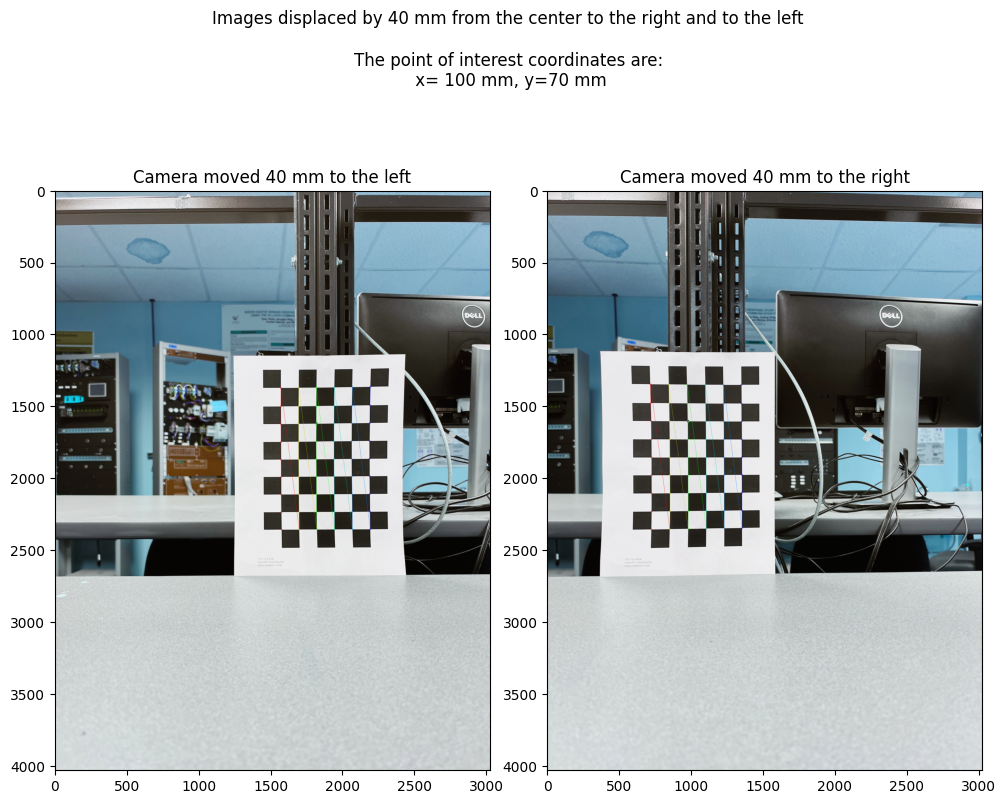

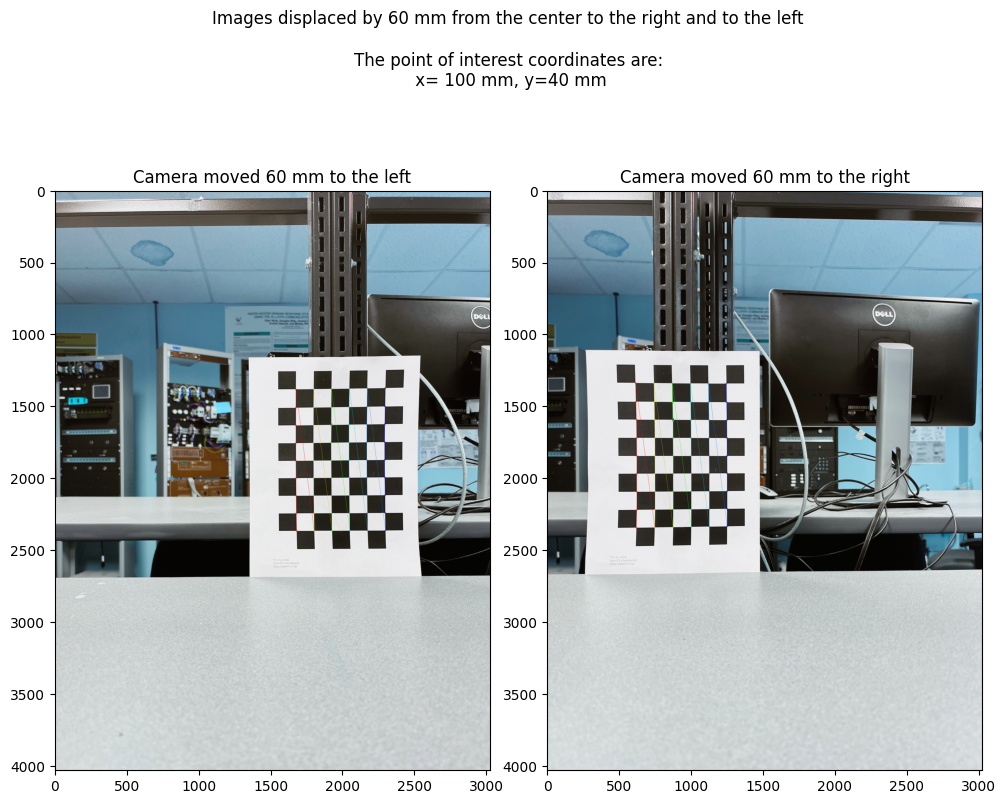

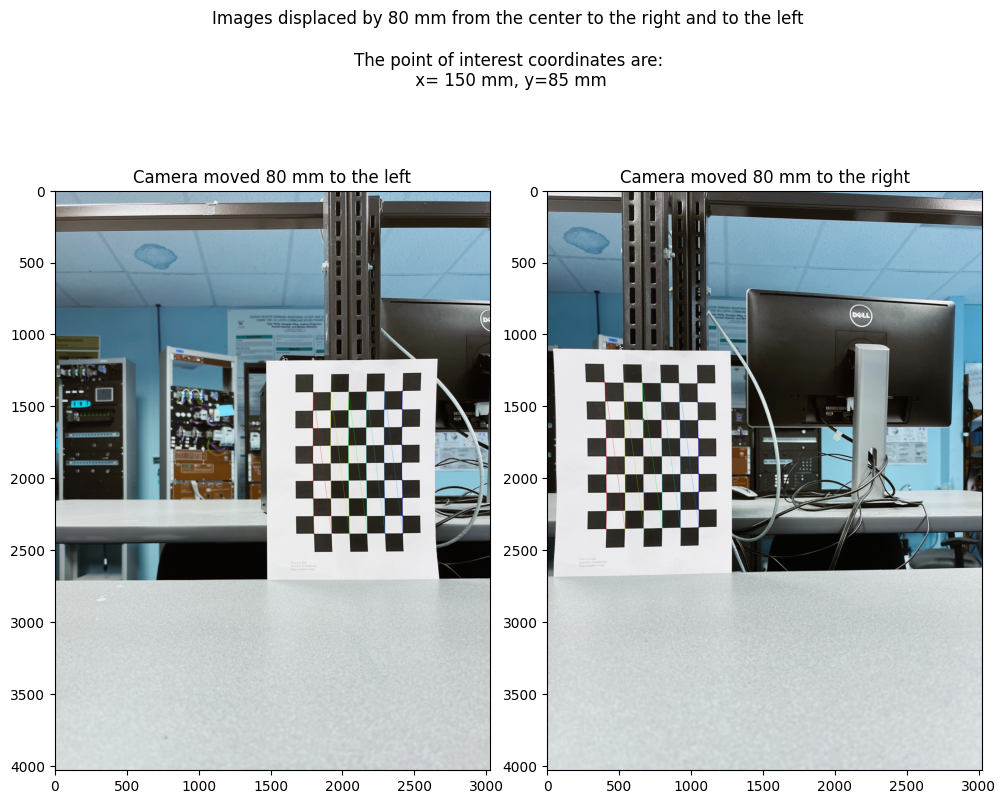

In [73]:
dir = '../../sample_data/'
images_of_interest = [i for i in os.listdir(dir) if 'cm' in i and i.endswith('.JPG')]

right_images = ['four_cm_right.JPG','six_cm_right.JPG', 'eight_cm_right.JPG']
left_images = ['four_cm_left.JPG','six_cm_left.JPG', 'eight_cm_left.JPG']

point_in_3d_world = (100,70) # mm
world_3d_points, img_plane_2d_points, image_size, img, right = calibrate_cam(images=right_images[0])
world_3d_points, img_plane_2d_points, image_size, img, left = calibrate_cam(images=left_images[0])
plots(displacement=40, right_line=right, left_line=left, corner_1=point_in_3d_world)

point_in_3d_world = (100,40) # mm
world_3d_points, img_plane_2d_points, image_size, img, right = calibrate_cam(images=right_images[1])
world_3d_points, img_plane_2d_points, image_size, img, left = calibrate_cam(images=left_images[1])
plots(displacement=60, right_line=right, left_line=left, corner_1=point_in_3d_world)

point_in_3d_world = (150,85) # mm
world_3d_points, img_plane_2d_points, image_size, img, right = calibrate_cam(images=right_images[2])
world_3d_points, img_plane_2d_points, image_size, img, left = calibrate_cam(images=left_images[2])
plots(displacement=80, right_line=right, left_line=left, corner_1=point_in_3d_world)


**Compare the accuracy of the estimated point locations from the pixel coordinates of the two camera locations to the actual 3D locations of the points. How accurate were your estimates?**
----

In [74]:
def calib_camera_testing ():
    results = {}
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    squares_size = 25 # mm
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) * squares_size

    world_3d_points = []
    img_plane_2d_points = []

    images_dict = {'four_cm_right.JPG' : (100,70),
                   'four_cm_left.JPG': (100,70),
                   'six_cm_right.JPG': (100, 40),
                   'six_cm_left.JPG': (100, 40),
                   'eight_cm_right.JPG': (150,85),
                   'eight_cm_left.JPG': (150,85)
                   }
    for img_name, img_coords in images_dict.items():
        image = cv.imread(f'../../sample_data/{img_name}')
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        corners_found, corners = cv.findChessboardCorners(image = gray,
                                                        patternSize=(9,6),
                                                        flags=None)
        if corners_found == True:
            world_3d_points.append(objp)
            corners2 = cv.cornerSubPix(image=gray,
                                        corners=corners,
                                        winSize=(11,11),
                                        zeroZone=(-1,-1), # A neglected zone. The -1,-1 is like None.
                                        criteria=criteria
                                        ) # more accurate corners (in subpixels)
        
            
            img_plane_2d_points.append(corners)
            cv.drawChessboardCorners(image=image,
                                    patternSize=(9,6),
                                    corners=corners2,
                                    patternWasFound=corners_found)

        image_size = gray.shape[::-1]
        reprojection_error, camera_matrix, distortion_coefficients, rotation_vectors, translation_vectors = cv.calibrateCamera(world_3d_points,
                                                                                                                            img_plane_2d_points,
                                                                                                                            image_size,
                                                                                                                            None,
                                                                                                                            None,
                                                                                                                            )
        chosen_world_points = np.array([[img_coords[0],img_coords[1],0]], dtype=np.float64)
        image_points_estimation,_ = cv.projectPoints(chosen_world_points,
                                                   rotation_vectors[0],
                                                   translation_vectors[0],
                                                   camera_matrix,
                                                   distortion_coefficients)
        
        if img_name not in results:
            results[img_name] = {'real_world_coords':[], 'estimated_coords':[]}
        results[img_name] = {'real_world_coords':(img_coords[0] * squares_size,img_coords[1] * squares_size),
                             'estimated_coords':image_points_estimation[0][0]}
    pp(results)
    

calib_camera_testing()

{'eight_cm_left.JPG': {'estimated_coords': array([1767.93167453, 2115.21336782]),
                       'real_world_coords': (3750, 2125)},
 'eight_cm_right.JPG': {'estimated_coords': array([1767.92765306, 2115.18429464]),
                        'real_world_coords': (3750, 2125)},
 'four_cm_left.JPG': {'estimated_coords': array([1840.24034478, 1870.96575068]),
                      'real_world_coords': (2500, 1750)},
 'four_cm_right.JPG': {'estimated_coords': array([1840.48177001, 1870.74946163]),
                       'real_world_coords': (2500, 1750)},
 'six_cm_left.JPG': {'estimated_coords': array([1988.27188861, 1869.49171228]),
                     'real_world_coords': (2500, 1000)},
 'six_cm_right.JPG': {'estimated_coords': array([1988.28310102, 1869.45579695]),
                      'real_world_coords': (2500, 1000)}}


### Explaining my attempt in solving problem 8 and 9
I specified three points on the chessboard paper. Each point has its x $\&$ y coordinates. The same ```calibrate_cam``` is used but with minor changes. These changes correspond to the following:

- The function reads multiple images instead of one.
- Each image, along with the coordinates of the chosen point, is specified in a dictionary (```images_dict```).
- A loop is added that iterates through the dictionary's keys (image names) and values (image coordinates).
- Within the loop, a set of openCV methods are used to find the chessboard corners, draw the lines, and refining the corners.
- **The new function this time** is the ```projectPoints```. I used this method because, as far as I understand, it maps the chosen points with the projected points from the model.
- From the results of each image, the accuracy of each image is not good, particularly on the x-axis. I don't know why that is. It is obviously not the algorithm; it might be poor measurements on my side of things.

**What did you learn from this assignment?**
----

- This assignment has been quite the work. The theory part of the assignment consumed most of the homework time. I think I have a better understanding of the intrinsic and extrinsic matrices, how they are formed, how they are calculated, and most importantly, why they are used.

**What questions, if any, do you have for me after completing this assignment?**
----

**IF** there is time during this quarter, can we go over the calculations of the 3D to 2D worlds or vice-versa? Not all the points, only one point from a chessboard image would work.